In [5]:
from d2l import torch as d2l
import torch
from torch import nn

In [28]:
torch.set_default_tensor_type('torch.cuda.FloatTensor')
device = torch.device('cuda')

In [34]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)
net = net.to(device)

RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'mat1' in call to _th_addmm

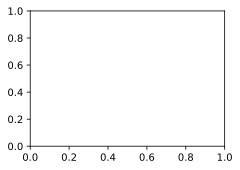

In [33]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss() #.to(device)
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
#train_iter, test_iter = train_iter.cuda(), test_iter.cuda()

#train_ch = d2l.train_ch3
#train_ch(net, train_iter, test_iter, loss, num_epochs, trainer)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [16]:
print(torch.rand(2,3).cuda())

tensor([[0.2343, 0.9480, 0.7309],
        [0.0272, 0.7512, 0.6690]])
